<a href="https://colab.research.google.com/github/leamarcec/Traffic_sign_classification/blob/main/klasifikacija_prometnih_znakova_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import zipfile

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/images.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
len(os.listdir('/tmp/images/'))

6

In [ ]:
base_dir = '/tmp/images/'

train_directory = os.path.join(base_dir, 'Train')

validation_directory = os.path.join(base_dir, 'Test')

In [ ]:
# Direktorij sa trening slikama koje predstavljaju znakove izricitih naredbi
train_class11_dir = os.path.join(train_directory, 'znakovi-izricitih-naredbi')

# Direktorij sa trening slikama koje predstavljaju znakove obavijesti
train_class22_dir = os.path.join(train_directory, 'znakovi-obavijesti')

# Direktorij sa trening slikama koje predstavljaju znakove opasnosti
train_class33_dir = os.path.join(train_directory, 'znakovi-opasnosti')

# Direktorij sa test slikama koje predstavljaju znakove izricitih naredbi
test_directory1 = os.path.join(validation_directory, 'znakovi-izricitih-naredbi')

# Direktorij sa test slikama koje predstavljaju znakove obavijesti
test_directory2 = os.path.join(validation_directory, 'znakovi-obavijesti')

# Direktorij sa test slikama koje predstavljaju znakove opasnosti
test_directory3 = os.path.join(validation_directory, 'znakovi-opasnosti')

In [ ]:
print('Total number of training images of traffic signs with explicit commands:', len(os.listdir(train_class11_dir)))
print('Total number of training images of traffic signs with road notifications:', len(os.listdir(train_class22_dir)))
print('Total number of training images of danger traffic signs:', len(os.listdir(train_class33_dir)))

print('Total number of test images of traffic signs with explicit commands:', len(os.listdir(test_directory1)))
print('Total number of test images of traffic signs with road notifications:', len(os.listdir(test_directory2)))
print('Total number of test images of danger traffic signs:', len(os.listdir(test_directory3)))

Total number of training images of traffic signs with explicit commands: 8856
Total number of training images of traffic signs with road notifications: 3240
Total number of training images of danger traffic signs: 4428
Total number of test images of traffic signs with explicit commands: 1698
Total number of test images of traffic signs with road notifications: 123
Total number of test images of danger traffic signs: 218


**Data Augmentation 2**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      # sklairanje slika
      rescale=1./255,

      #rotiranje 20%
      rotation_range=20,

      # random razvlacenje u sirinu za 20%
      width_shift_range=0.2,

      # random razvlacenje u visinu 20%
      height_shift_range=0.2,

      #okretanje slike horizontalno
      horizontal_flip=True
      )

# sklairanje slika
validation_datagen = ImageDataGenerator(
      rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_directory,

        # nove postavljene dimenzije slika
        target_size=(300, 300),

        # velicina mini batcha
        batch_size=64,

        # buduci da postoje tri klase, nije moguce postaviti class_mode na binary kao u primjeru
        # Horse or Human, vec mora biti categorical
        # izvor: https://stackoverflow.com/questions/59439128/what-does-class-mode-parameter-in-keras-image-gen-flow-from-directory-signify
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_directory,
        target_size=(300, 300),
        batch_size=64,
        class_mode='categorical')

Found 16524 images belonging to 3 classes.
Found 2039 images belonging to 3 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([

    # Prvi konvolucijski sloj
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Drugi konvolucijski sloj
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPooling2D(2,2),

    # Treci konvolucijski sloj
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPooling2D(2,2),

    # Cetvrti konvolucijski sloj
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),

    # Skriveni sloj
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 dropout (Dropout)           (None, 147, 147, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        1

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import optimizers
optimizer = keras.optimizers.Adam(learning_rate=5e-4)
loss_func = keras.losses.CategoricalCrossentropy()

model.compile(optimizer=optimizer,
              loss=loss_func,
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=30,
                    epochs=20,
                    validation_steps=30,
                    batch_size=64,
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 262s 9s/step - loss: 1.1086 - accuracy: 0.4802 - val_loss: 0.9106 - val_accuracy: 0.8333
Epoch 2/20
30/30 [==============================] - 251s 8s/step - loss: 0.8754 - accuracy: 0.5766 - val_loss: 0.5653 - val_accuracy: 0.9000
Epoch 3/20
30/30 [==============================] - 260s 9s/step - loss: 0.6824 - accuracy: 0.6854 - val_loss: 0.5453 - val_accuracy: 0.8786
Epoch 4/20
30/30 [==============================] - 293s 10s/step - loss: 0.5328 - accuracy: 0.7979 - val_loss: 0.4391 - val_accuracy: 0.9187
Epoch 5/20
30/30 [==============================] - 259s 9s/step - loss: 0.3914 - accuracy: 0.8646 - val_loss: 0.3041 - val_accuracy: 0.9307
Epoch 6/20
30/30 [==============================] - 254s 8s/step - loss: 0.3123 - accuracy: 0.8875 - val_loss: 0.4025 - val_accuracy: 0.8542
Epoch 7/20
30/30 [==============================] - 292s 10s/step - loss: 0.2509 - accuracy: 0.9104 - val_loss: 0.4219 - val_accuracy: 0.7896
Epoch 8/20


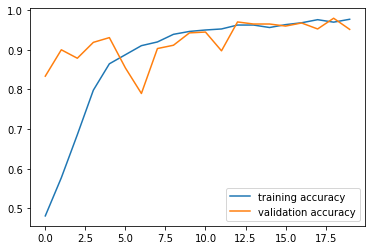

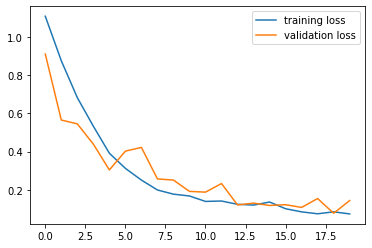

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"],label="training accuracy")
plt.plot(history.history["val_accuracy"],label="validation accuracy")
plt.legend()
plt.show();

plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.legend()
plt.show();

Iz grafičkog prikaza vidljivo je da je točnost na validacijskom skupu sve bliža točnosti na trening skupu, što je zadovoljavajući rezultat.

In [ ]:
model_json = model.to_json()
with open("model2.json", "w") as json_file:
  json_file.write(model_json)

model.save_weights('model2.h5')

!cp model2.h5 /content/drive/MyDrive

**6. ZAKLJUČAK**
Kako bi se pronašao dobar model potrebno je isprobavati različite hiperparametre. Osim izgrađena dva modela svakako bi se moglo napraviti još raznih modela, ali budući da je točnost modela vrlo zadovoljavajuća, to u ovom primjeru neće biti potrebno. Vrlo je važno koristiti pogodne konvolucijske slojeve, ali i primjerene aktivacijske funkcije, jer upotrebom hiperparametara koji nisu pogodni za određenu vrstu podataka neće dati zodovoljavajući rezultat.